In [1]:
import pandas as pd
import sys 
import scipy 
import numpy as np
import sklearn
import matplotlib
import seaborn as sns

In [70]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier 
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('high_diamond_ranked_10min.csv') #data from https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min
print(data.head(20))
print(data.columns)

        gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0   4519157822         0               28                   2               1   
1   4523371949         0               12                   1               0   
2   4521474530         0               15                   0               0   
3   4524384067         0               43                   1               0   
4   4436033771         0               75                   4               0   
5   4475365709         1               18                   0               0   
6   4493010632         1               18                   3               1   
7   4496759358         0               16                   2               0   
8   4443048030         0               16                   3               0   
9   4509433346         1               13                   1               1   
10  4452162573         0               20                   3               1   
11  4453038156         0    

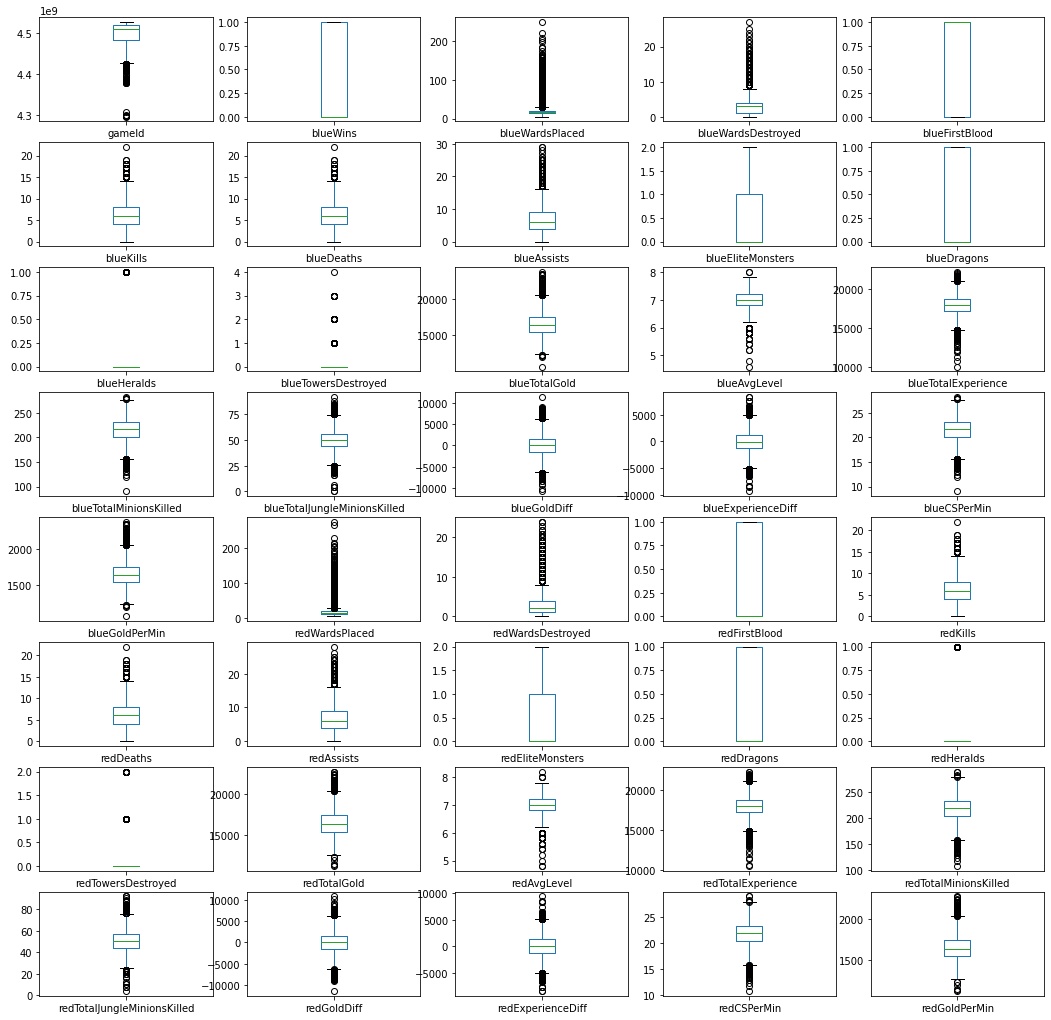

In [4]:
data.plot(kind='box', subplots=True, layout = (8,5), sharex=False, sharey=False, figsize = (18,18))
pyplot.show()

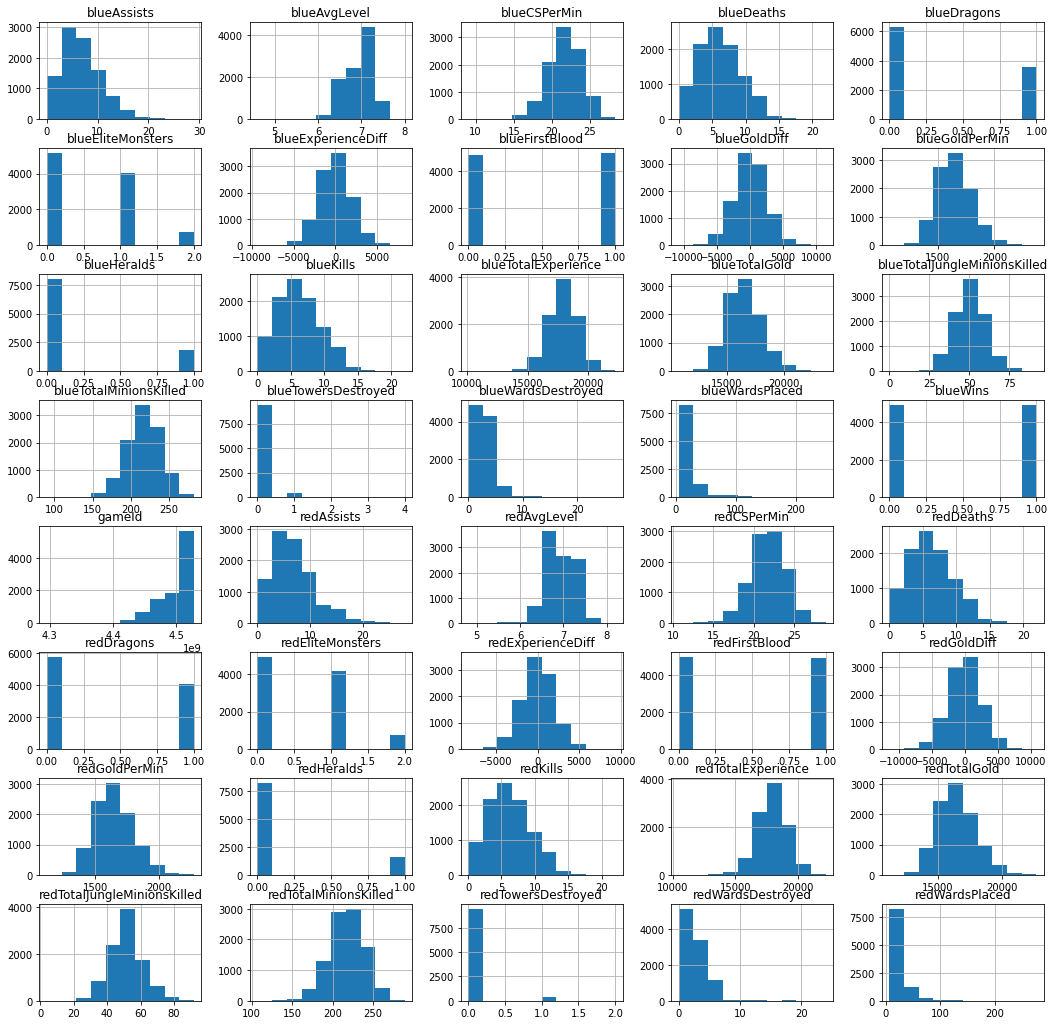

In [5]:
# scatter_matrix(data,figsize= (18, 16)) too messy to show
data.hist(figsize = (18,18), layout = (8,5))
pyplot.show()

In [44]:
features = data.drop(['gameId', 'blueWins'], axis =1) #use of all features 
target = data['blueWins']

In [45]:
f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=0.2)

In [46]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [47]:
outcomes = []
tests = []
for x, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #10-fold cross validation
    cv_results = cross_val_score(model, f_train, t_train, cv=kfold, scoring='accuracy') #scoring
    outcomes.append(cv_results)
    tests.append(x)
    print('Accuracy of %s: %f (%f)' % (x, cv_results.mean(), cv_results.std()))

Accuracy of LR: 0.732256 (0.019441)
Accuracy of LDA: 0.730230 (0.020130)
Accuracy of KNN: 0.687715 (0.010123)
Accuracy of CART: 0.639759 (0.017351)
Accuracy of NB: 0.727446 (0.015285)
Accuracy of SVM: 0.502594 (0.000340)


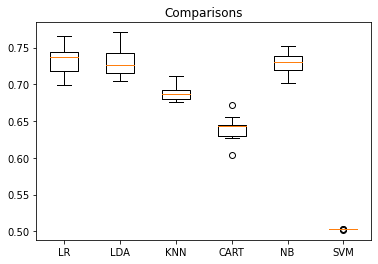

In [48]:
pyplot.boxplot(outcomes, labels=tests)
pyplot.title('Comparisons')
pyplot.show()

In [49]:
b_model = LogisticRegression(solver='liblinear', multi_class='ovr') #this model had the highest accuracy 
b_model.fit(f_train, t_train)
predictions = b_model.predict(f_test)

In [50]:
print("Accuracy Score: ", accuracy_score(t_test, predictions))
print("Confusion Matrix: ", confusion_matrix(t_test, predictions))

Accuracy Score:  0.7353238866396761
Confusion Matrix:  [[704 273]
 [250 749]]


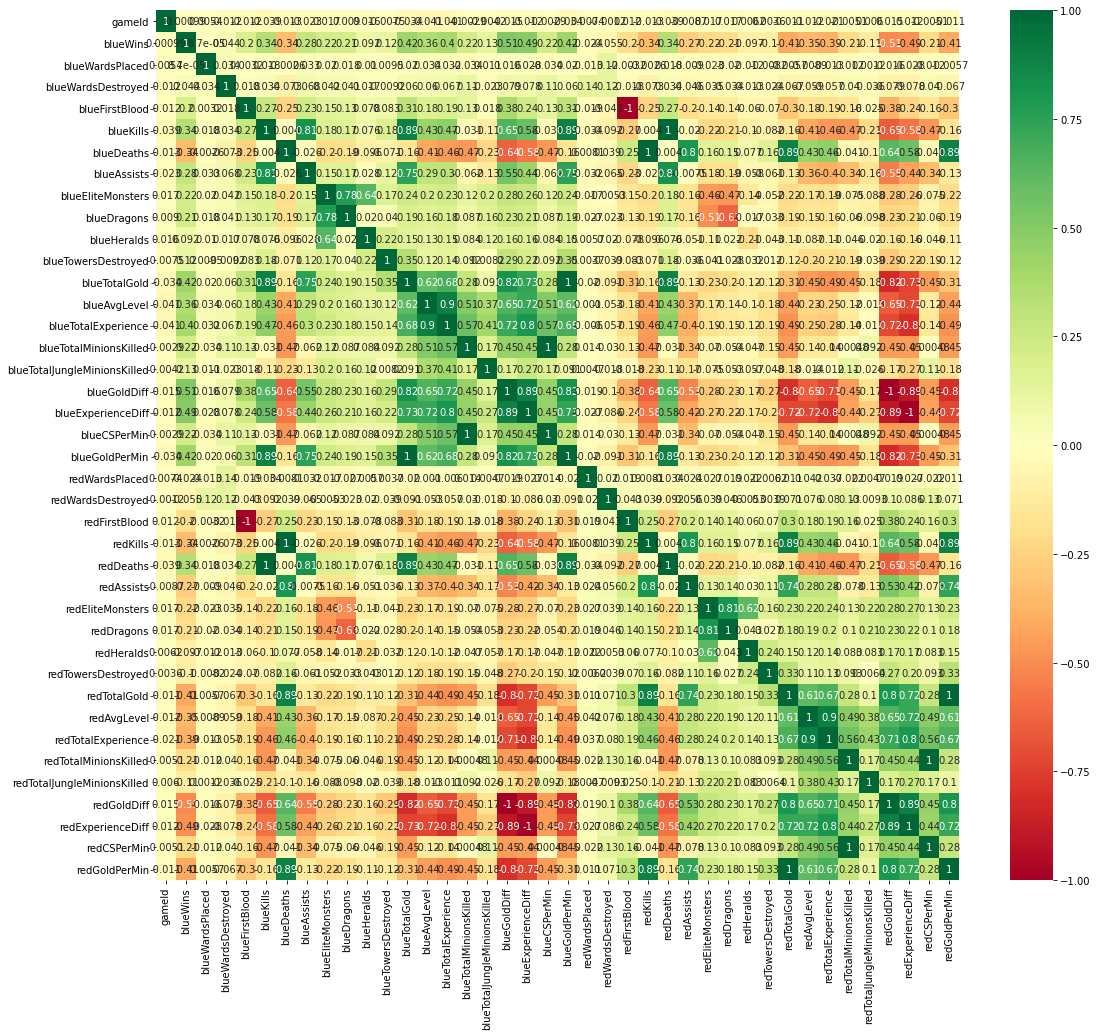

blueWins        1.000000
blueGoldDiff    0.511119
Name: blueWins, dtype: float64

In [51]:
pyplot.figure(figsize=(18,16))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=pyplot.cm.RdYlGn)
pyplot.show()
cor_target = (cor["blueWins"])
relevant_features = cor_target[cor_target>0.5] #identifying relavently correlated features
relevant_features

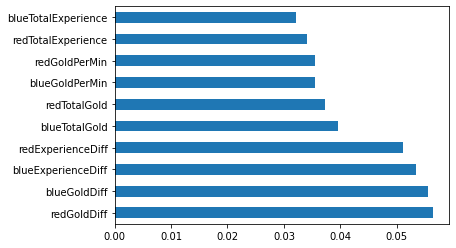

In [52]:
model_find = ExtraTreesClassifier() #using ExtraTreesClassifier to identify top 10 most important features
model_find.fit(features,target)
# print(model.feature_importances_) 
feat_importances = pd.Series(model_find.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
pyplot.show()

In [97]:
features_best_1 = data[['blueGoldDiff']]
features_top_10 = data[['redTotalExperience','blueTotalExperience','redTotalGold','blueGoldPerMin', 'redGoldPerMin', 'redExperienceDiff', 'blueExperienceDiff', 'blueGoldDiff', 'redGoldDiff']]

In [98]:
f1_train, f1_test, t1_train, t1_test = train_test_split(features_best_1, target, test_size=0.2)

In [99]:
outcomes_best_1 = []
tests_best_1 = []
for x, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #10-fold cross validation
    cv_results = cross_val_score(model, f1_train, t1_train, cv=kfold, scoring='accuracy') #scoring
    outcomes_best_1.append(cv_results)
    tests_best_1.append(x)
    print('Accuracy of %s: %f (%f)' % (x, cv_results.mean(), cv_results.std()))

Accuracy of LR: 0.725801 (0.015511)
Accuracy of LDA: 0.726434 (0.014997)
Accuracy of KNN: 0.685816 (0.011700)
Accuracy of CART: 0.645324 (0.013608)
Accuracy of NB: 0.726687 (0.015174)
Accuracy of SVM: 0.624950 (0.011993)


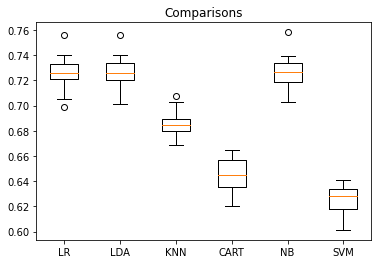

In [100]:
pyplot.boxplot(outcomes_best_1, labels=tests_best_1)
pyplot.title('Comparisons')
pyplot.show()

In [101]:
best_model = GaussianNB() #this model had the highest accuracy 
best_model.fit(f1_train, t1_train)
predictions_1 = best_model.predict(f1_test)

In [102]:
print(accuracy_score(t1_test, predictions_1))
print(confusion_matrix(t1_test, predictions_1))

0.7115384615384616
[[695 286]
 [284 711]]


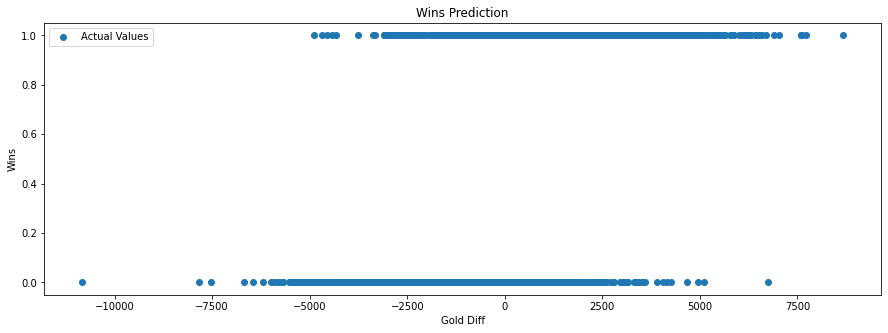

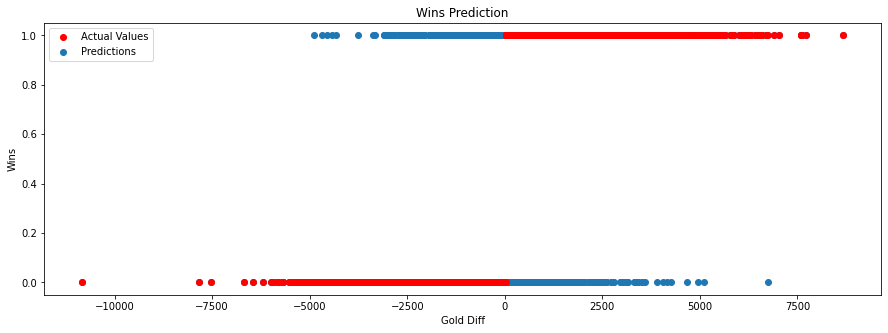

In [136]:
#understanding where the algorithm is wrong
pyplot.subplots(figsize=(15, 5)) #plotting actual values 
pyplot.scatter(f1_test, t1_test)
pyplot.legend(["Actual Values"])
pyplot.title('Wins Prediction')
pyplot.xlabel('Gold Diff')
pyplot.ylabel('Wins')

pyplot.subplots(figsize=(15, 5)) #plotting actual values with predictions
pyplot.scatter(f1_test,t1_test)
pyplot.plot(f1_test, predictions_1, 'o', color='red', alpha = 1)
pyplot.legend(["Actual Values","Predictions"])
pyplot.title('Wins Prediction')
pyplot.xlabel('Gold Diff')
pyplot.ylabel('Wins')
pyplot.show()

In [103]:
f10_train, f10_test, t10_train, t10_test = train_test_split(features_top_10, target, test_size=0.2)

In [104]:
outcomes_top_10 = []
tests_top_10 = []
for x, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #10-fold cross validation
    cv_results = cross_val_score(model, f10_train, t10_train, cv=kfold, scoring='accuracy') #scoring
    outcomes_top_10.append(cv_results)
    tests_top_10.append(x)
    print('Accuracy of %s: %f (%f)' % (x, cv_results.mean(), cv_results.std()))

Accuracy of LR: 0.724284 (0.009532)
Accuracy of LDA: 0.724411 (0.009457)
Accuracy of KNN: 0.683667 (0.019717)
Accuracy of CART: 0.633556 (0.013297)
Accuracy of NB: 0.724284 (0.010036)
Accuracy of SVM: 0.501202 (0.000341)


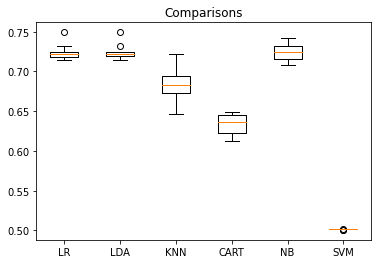

In [105]:
pyplot.boxplot(outcomes_top_10, labels=tests_top_10)
pyplot.title('Comparisons')
pyplot.show()

In [106]:
top_10_model = LinearDiscriminantAnalysis()
top_10_model.fit(f10_train, t10_train)
predictions_10 = top_10_model.predict(f10_test)

In [107]:
print(accuracy_score(t10_test, predictions_10))
print(confusion_matrix(t10_test, predictions_10))

0.7403846153846154
[[732 275]
 [238 731]]


# Inspiration + Background
Legaue of legends is a popular MOBA game where teams choose champions/heroes, each with special and unique abilities, to battle collaborate and battle each other. If the teams, seperated to blue and red, lose their base/have their Nexus destroyed they lose the game. The game is full of high intesity and impact moments where the first several minutes can define the outcome of the game, so I decided to see if a game's outcome could be predicted with data collected from the first 10 min.  of the game. Also, as there could be a lot of messy data within lower ranks, I decided to use data from Kaggle, as mentioned above, of "diamond-ranked" players. According to statistics only about 3% of players are ranked "diamond." 

I initally took inspiration to create these models because of the facination that surrounds this game. Many gamers put hours into climbing the ranks, and after witnessing my friends play the game at a high level, I wanted to learn more and see what kind of factors effected the game's outcome. 
# Basic Insight
It was interesting to see how impactful the first 10 min. of a usually 20-40 min game could be. It seemed the gold differential between each teams during the first 10 min. of the game usually decides the outcome. It could be seen that it was the most correlated factor when deciding the winner. However, solely using this factor to determine who would win was not the best method in predicitng the outcome. When looking at the 3 steps of algorithmic modeling I had done (first using all of the factors to determine the outcome, second using the most correlated factor, and third using the top ten most "important" factors), it is shown that in fact using the top 10 factors had the most accurate predicitons. Although the accuracy scores were only off by a percent or two, it seems that more than gold differential is needed to predict the outcome. 